# Softwareaufgabe Systemidentifikation
```shell
Seminar: Adaptive Filter, SoSe 2018
Betreuung: M.Sc. Liven Lange, Prof. Dr.-Ing. Sikora

Eingereicht von Maximilian Weber (385153)
```
<img src="media/SimAufgabe.png" alt="Drawing" style="width: 800px;"/>

In [14]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
import tools as ts

# import data as dictionary
importMat, fileNames = ts.importmat('./data/')

*** Importing files from directory: ./data/
* importing: System_FIR27.mat
* importing: System_FIR3.mat
* importing: System_IIR27.mat
* importing: Systemwechsel_FIR27.mat
* importing: Systemwechsel_IIR27.mat
* importing: Test.mat
* importing: Training.mat
*** 7 files imported


## Vorbereitungsaufgabe
Erstelle ein empfängerseitiges adaptives FIR Filter mit $N$ Koeffizienten, dass anhand des empfangenen Signals $d[k]$ eine Systemidentifikation durchführt. Implementiere eigenständig sowohl den LMS als auch den RLS als Lernalgorithmus.

In [15]:
# import algorithms
import algorithms as algo

## Aufgabe 1
Für das FIR-Filter: Untersuche den Einfluss der Anzahl an Filterkoeffizienten $N \in \{1, 2, 5\}$, der Wahl des Lernalgorithmus (LMS, RLS) sowie den Einfluss der Varianz des AWGNS ($\sigma^2 \in \{0.001, 0.1, 1, 10\}$). Wähle sinnvolle Kombinationen um die Einflüsse gut beschreiben zu können. Dokumentiere dazu die Filtergewichte und Fehlerwerte je Iteration. Vergleiche LMS und RLS miteinander und beschreibe jeweilige Vorzüge und Nachtteile.

Input signal mean:  -0.018132438065400953
Input signal variance:  1.0270666666078994


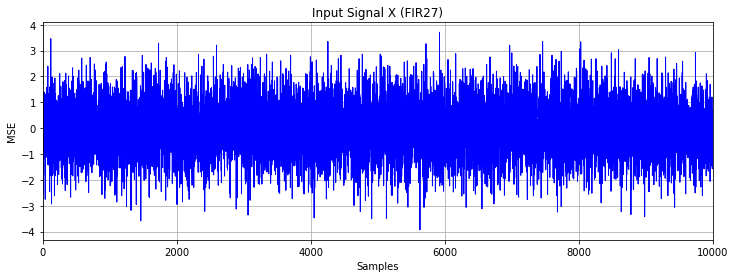

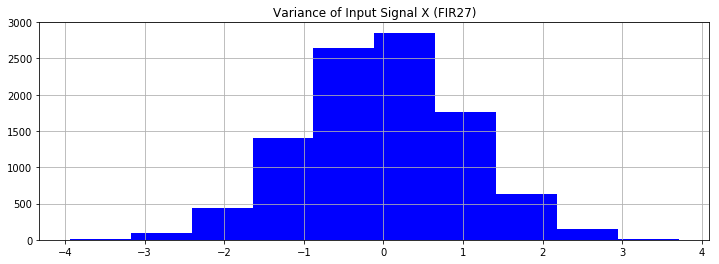

In [16]:
# load FIR data from dictionary
HfirD = importMat['System_FIR27']['D_']
HfirX = importMat['System_FIR27']['X']

# check input signal variance and plot
ts.plot(HfirX,'Input Signal X (FIR27)','lin',10000)
ts.hist(HfirX,'Variance of Input Signal X (FIR27)')
print('Input signal mean: ',np.mean(HfirX))
print('Input signal variance: ',np.var(HfirX))

* LMS: N = 1, mu = 0.001, w = [0.70155176]
       with AWGNS variance = 0.001
* LMS: N = 2, mu = 0.01, w = [0.61075812 0.051921  ]
       with AWGNS variance = 0.1
* LMS: N = 5, mu = 0.01, w = [ 0.61730904  0.0937369  -0.02638323  0.1666816  -0.19014449]
       with AWGNS variance = 0.1


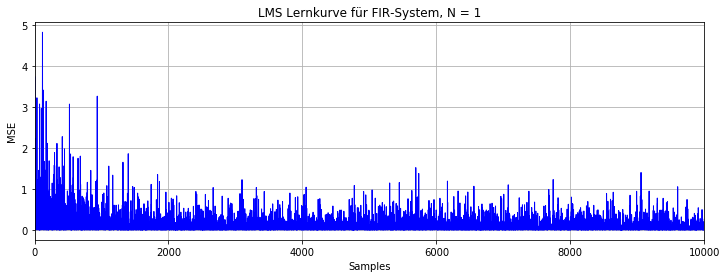

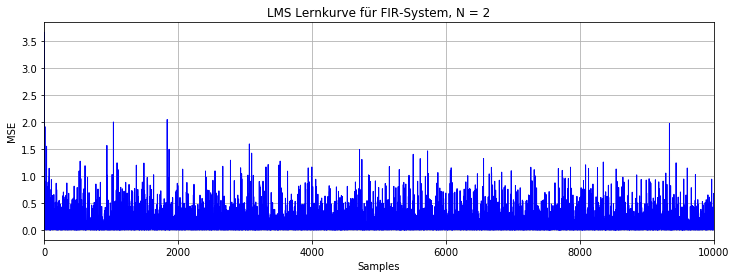

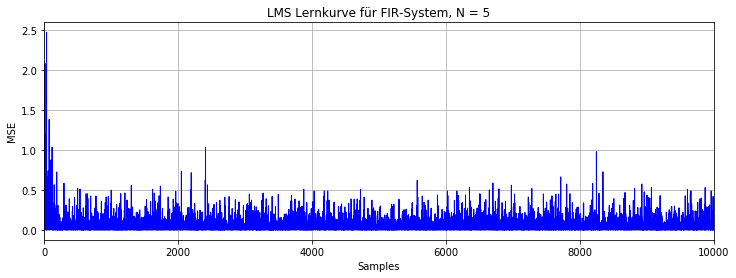

In [17]:
# FIR LMS study
# N  = 1, 2, 5
# mu = free
# var = 0.001, 0.1, 1, 10

# Length of displayed plot
plotLen = 10000
plotStyle = 'lin'

# N = 1
N, mu, var = 1, 0.001, 0.001
HfirXn = ts.addNoise(HfirX, var)
E, W, w, Yd = algo.lmsAlg(N, mu, HfirXn, HfirD, np.zeros(N))
ts.plot(E.T ,'LMS Lernkurve für FIR-System, N = '+str(N),plotStyle, plotLen)
print('       with AWGNS variance = '+str(var))

# N = 2
N, mu, var = 2, 0.01, 0.1
HfirXn = ts.addNoise(HfirX, var)
E, W, w, Yd = algo.lmsAlg(N, mu, HfirXn, HfirD, np.zeros(N))
ts.plot(E.T ,'LMS Lernkurve für FIR-System, N = '+str(N),plotStyle, plotLen)
print('       with AWGNS variance = '+str(var))

# N = 5
N, mu, var = 5, 0.01, 0.1
HfirXn = ts.addNoise(HfirX, var)
E, W, w, Yd = algo.lmsAlg(N, mu, HfirXn, HfirD, np.zeros(N))
ts.plot(E.T ,'LMS Lernkurve für FIR-System, N = '+str(N),plotStyle, plotLen)
print('       with AWGNS variance = '+str(var))

* RLS: N = 5, mu = 0.001, w = [ 0.69377847  0.09858068 -0.03031224  0.17759239 -0.23855695]
       with AWGNS variance = 0.01


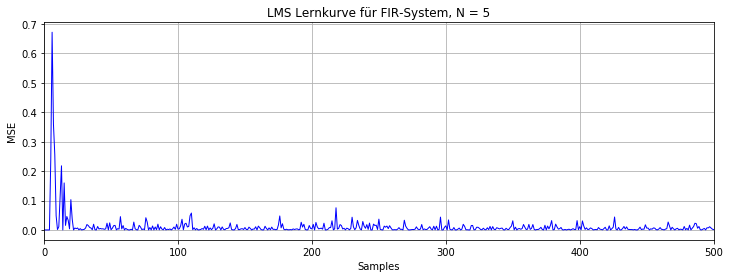

In [18]:
# FIR RLS study
# N  = 1, 2, 5
# mu = free
# var = 0.001, 0.1, 1, 10

# Length of displayed plot
plotLen = 500
plotStyle = 'lin'

# N = 1
N, mu, var = 5, 0.001, 0.01
HfirXn = ts.addNoise(HfirX, var)
E, W, w, Yd = algo.rlsAlg(N, mu, HfirXn, HfirD, np.zeros(N))
ts.plot(E.T ,'LMS Lernkurve für FIR-System, N = '+str(N),plotStyle, plotLen)
print('       with AWGNS variance = '+str(var))

#### Aufgabe 1: Systemidentifikation eines FIR Systems mit variablem AWGNS
Wie in den plots oben zu sehen...

## Aufgabe 2
Für das IIR-Filter: Stelle die gleichen Untersuchungen wie beim FIR-Filter an.

* LMS: N = 1, mu = 0.001, w = [0.70215652]
       with AWGNS variance = 0.001


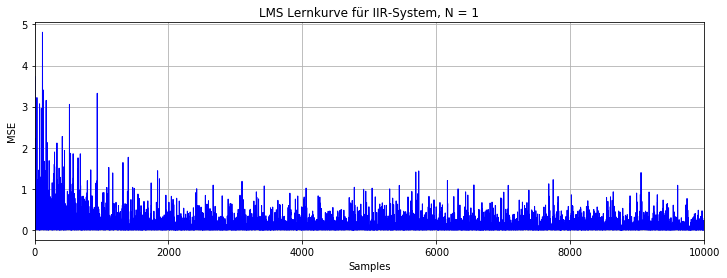

In [19]:
# IIR LMS study
# N  = 1, 2, 5
# mu = free
# var = 0.001, 0.1, 1, 10

# Length of displayed plot
plotLen = 10000
plotStyle = 'lin'

# N = 1
N, mu, var = 1, 0.001, 0.001
HfirXn = ts.addNoise(HfirX, var)
E, W, w, Yd = algo.lmsAlg(N, mu, HfirXn, HfirD, np.zeros(N))
ts.plot(E.T ,'LMS Lernkurve für IIR-System, N = '+str(N),plotStyle, plotLen)
print('       with AWGNS variance = '+str(var))

#### Aufgabe 2: Systemidentifikation eines IIR Systems mit variablem AWGNS
Wie in den plots oben zu sehen...

## Aufgabe 3
Es soll nun der Einfluss eines plötzlichen Systemwechsels untersucht werden. Dazu werden die Filterkoeffizien- ten des erzeugenden Systems nach 5000 Iterationen geändert. Lade nun die Datei Systemwechsel_FIR.mat und Systemwechsel_IIR.mat. Sie enthalten die gleichen Signale wie schon System_FIR.mat und System_IIR.mat. Zeige wiederum das Lernverhalten für verschiedene Störeinflüsse, Lernalgorithmen und Fitlerordungen. Erläutere auch hieran das Adaptionsverhalten. Welches Verfahren eignet sich unter welchen Bedingungen am besten?

In [20]:
# load FIR data from dictionary
HfirDc = importMat['Systemwechsel_FIR27']['D_']
HfirXc = importMat['Systemwechsel_FIR27']['X']

# check input signal 1 variance and plot
print('Input signal 1 mean: ',np.mean(HfirDc[0,0:5000]))
print('Input signal 1 variance: ',np.var(HfirDc[0,0:5000]))

# check input signal 2
print('Input signal 2 mean: ',np.mean(HfirDc[0,5000:]))
print('Input signal 2 variance: ',np.var(HfirDc[0,5000:]))

Input signal 1 mean:  -0.010424975412711203
Input signal 1 variance:  0.5975436877185286
Input signal 2 mean:  -0.006704814028154175
Input signal 2 variance:  0.33584297731446144


* LMS: N = 5, mu = 0.01, w = [ 0.39113468 -0.00829246  0.29634512 -0.17516657 -0.19202033]
       with AWGNS variance = 0.01


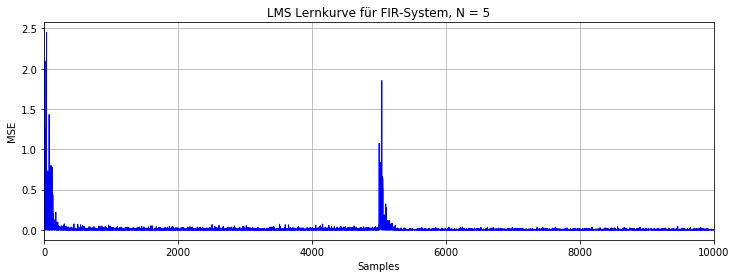

In [21]:
# FIR LMS study: System change
# N  = 1, 2, 5
# mu = free
# var = 0.001, 0.1, 1, 10

# Length of displayed plot
plotLen = 10000
plotStyle = 'lin'

# N = 1
N, mu, var = 5, 0.01, 0.01
HfirXcn = ts.addNoise(HfirXc, var)
E, W, w, Yd = algo.lmsAlg(N, mu, HfirXcn, HfirDc, np.zeros(N))
ts.plot(E.T ,'LMS Lernkurve für FIR-System, N = '+str(N),plotStyle, plotLen)
print('       with AWGNS variance = '+str(var))

* RLS: N = 5, mu = 0.01, w = [ 0.49803628  0.04466818  0.12344825  0.00094756 -0.20063424]
       with AWGNS variance = 0.1


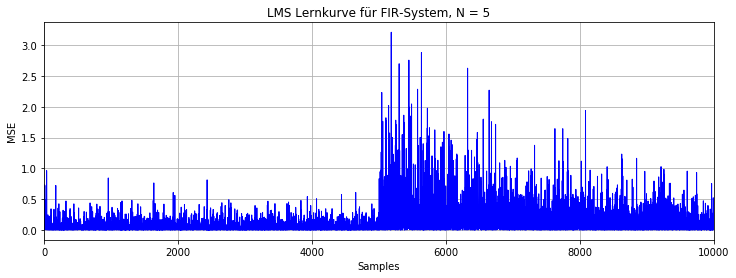

In [25]:
# FIR RLS study: System change
# N  = 1, 2, 5
# mu = free
# var = 0.001, 0.1, 1, 10

# Length of displayed plot
plotLen = 10000
plotStyle = 'lin'

# N = 1
N, mu, var = 5, 0.01, 0.1
HfirXcn = ts.addNoise(HfirXc, var)
E, W, w, Yd = algo.rlsAlg(N, mu, HfirXcn, HfirDc, np.zeros(N))
ts.plot(E.T ,'LMS Lernkurve für FIR-System, N = '+str(N),plotStyle, plotLen)
print('       with AWGNS variance = '+str(var))

## Aufgabe 4
Es soll nun ein Kernel Least Mean Squares (KLMS) Filter entworfen werden, dass eine Zeitreihenschätzung vor- nimmt. Zum Training wird eine Zeitreihe mit 500 Werten in der Datei Training.mat gegeben. Das trainierte Filter soll anschließend mit der Zeitreihe in Test.mat getestet werden. Der Kernel des KLMS darf aus der Fa- milie der Exponentialfunktionen frei gewählt werden (Gauss, Laplace, oä.). Zum Vergleich der Schätzfähigkeit des KLMS sollen sowohl 5 vergangene als auch 10 vergangene Werte zur Schätzung herangezogen werden. Das gleiche Testszenario soll weiterhin mit einem LMS umgesetzt und für einen Vergleich zum KLMs herangezo- gen werden. Dazu sind Fehlerkurven auf den Testdaten zu erstellen sowie Erläuterungen zu den Einflüssen der jeweiligen Parameter der Filter anzugeben.

In [26]:
# load KLMS training and test data from dictionary
x_training = importMat['Training']['x_training']
x_test = importMat['Test']['x_test']